In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
train_data = pd.read_csv('titanic_dataset/train.csv')
# train_data.head()
print(train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [6]:
print("Columns in train_data:", train_data.columns)

Columns in train_data: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
train_data = train_data.drop(columns='Cabin', axis=1)

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
age_median = train_data['Age'].median()
train_data = train_data.fillna(age_median)

In [10]:
embarked_mode = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(embarked_mode)

In [11]:
print(embarked_mode)

S


In [12]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
import seaborn as sns
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

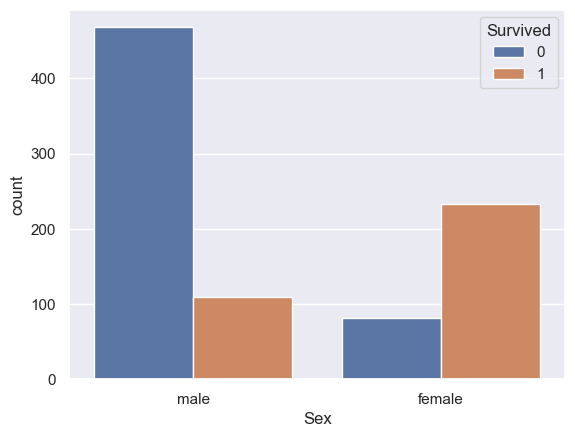

In [15]:
sns.countplot(x='Sex', hue='Survived', data=train_data)

<Axes: xlabel='Pclass', ylabel='count'>

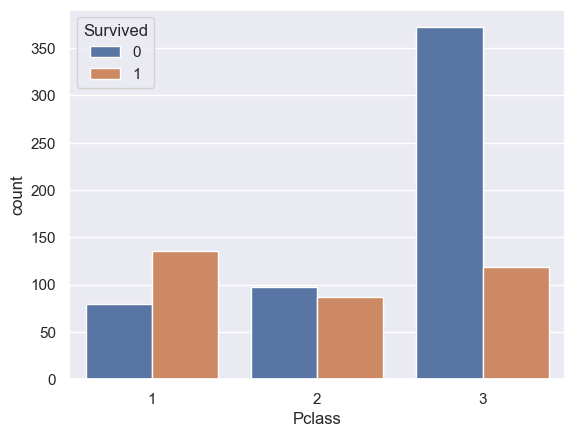

In [16]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)

In [17]:
train_data['Embarked'].value_counts()

Embarked
S       644
C       168
Q        77
28.0      2
Name: count, dtype: int64

In [18]:
print("Unique values:", train_data['Embarked'].unique())

Unique values: ['S' 'C' 'Q' 28.0]


In [19]:
# Get the most frequent valid Embarked value (excluding 28.0)
valid_embarked = train_data[train_data['Embarked'].isin(['S','C','Q'])]['Embarked']
mode_embarked = valid_embarked.mode()[0]

# Replace 28.0 with the mode
train_data['Embarked'] = train_data['Embarked'].replace(28.0, mode_embarked)

In [20]:
print(train_data['Embarked'].value_counts())

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [21]:
train_data = train_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}).astype({
    'Sex': 'int8',
    'Embarked': 'int8'
})

C:\Users\God-user\AppData\Local\Temp\ipykernel_4356\2801775363.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data = train_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}).astype({


In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [23]:
X = train_data.drop(columns=['Survived','Name','Ticket'], axis=1)
y = train_data['Survived']

In [24]:
print(X)

     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1       3    0  22.0      1      0   7.2500         0
1              2       1    1  38.0      1      0  71.2833         1
2              3       3    1  26.0      0      0   7.9250         0
3              4       1    1  35.0      1      0  53.1000         0
4              5       3    0  35.0      0      0   8.0500         0
..           ...     ...  ...   ...    ...    ...      ...       ...
886          887       2    0  27.0      0      0  13.0000         0
887          888       1    1  19.0      0      0  30.0000         0
888          889       3    1  28.0      1      2  23.4500         0
889          890       1    0  26.0      0      0  30.0000         1
890          891       3    0  32.0      0      0   7.7500         2

[891 rows x 8 columns]


In [25]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
X_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, X_train_pred)
print("Training Accuracy: ", train_accuracy)

Training Accuracy:  0.8117977528089888


In [ ]:
test_data = pd.read_csv('titanic_dataset/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
print(test_data)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [32]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
test_data = test_data.drop(columns='Cabin', axis=1)

In [34]:
age_median = test_data['Age'].median()
test_data = test_data.fillna(age_median)

In [35]:
fare_median = test_data['Fare'].median()
test_data['Fare'] = test_data['Fare'].fillna(fare_median)

In [36]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [37]:
test_data = test_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}).astype({
    'Sex': 'int8',
    'Embarked': 'int8'
})

C:\Users\God-user\AppData\Local\Temp\ipykernel_4356\133552212.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data = test_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}).astype({


In [38]:
test_data = test_data.drop(columns=['Name','Ticket'], axis=1)

In [39]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [40]:
test_pred = model.predict(test_data)

In [41]:
output = pd.DataFrame({'PassengerId':test_data['PassengerId'], 'Survived': test_pred})
output.to_csv('submission.csv', index=False)
print("Your submission has successfully saved.")

Your submission has successfully saved.


Using SVM using Hyper_Parameter Tuning

In [42]:
from sklearn import svm

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 50, 100],   # More granular regularization
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # More refined values
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Try sigmoid too
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}


In [63]:
# Create SVM classifier
svc = svm.SVC()

# Set up grid search
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all available cores
    verbose=1,          # Print progress
    scoring='accuracy'  # Metric to optimize
)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [64]:
# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_svc = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_svc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Best parameters found:  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Test accuracy: 0.7877


In [68]:
print(set(X_train.columns) - set(test_data.columns))

set()


In [65]:
X_train_predict = best_svc.predict(X_train_scaled)
train_accuracy_1 = accuracy_score(y_train, X_train_predict)
print("Training Accuracy: ", train_accuracy_1)

Training Accuracy:  0.8567415730337079


In [66]:
test_data_scaled = scaler.transform(test_data)  # Use the same scaler
test_pred_1 = best_svc.predict(test_data_scaled)

In [67]:
output_1 = pd.DataFrame({'PassengerId':test_data['PassengerId'], 'Survived': test_pred_1})
output_1.to_csv('submission_1.csv', index=False)
print("Your submission has successfully saved.")

Your submission has successfully saved.


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
param_grid1 = {
    'n_estimators' : [50,100,200],
    'max_depth' : [None, 5, 10],
    'min_samples_split' : [2, 5, 10]
}

In [53]:
grid_search1 = GridSearchCV(RandomForestClassifier(), param_grid1, cv=5)
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [54]:
print("Best Params: ", grid_search1.best_params_)
best_model = grid_search1.best_estimator_

Best Params:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [55]:
X_train_predict_1 = best_model.predict(X_train)
train_accuracy_2 = accuracy_score(y_train, X_train_predict_1)
print("Training Accuracy: ", train_accuracy_2)

Training Accuracy:  0.9550561797752809


In [56]:
best_rf_model = grid_search1.best_estimator_
test_pred_rf = best_rf_model.predict(test_data)

In [57]:
y_pred_rf = best_rf_model.predict(X_test)  # Predict on validation set
test_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Validation Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.7709


In [58]:
test_pred_2 = best_model.predict(test_data)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)


param_grid1 = {
    'n_estimators': [50, 100],  # Reduce tree count
    'max_depth': [3, 5, 7],  # Restrict tree depth more
    'min_samples_split': [10, 15],  # Prevent deep splits
    'min_samples_leaf': [5, 10],  # Avoid small leaves
    'max_features': ['sqrt', 'log2', None]  # Reduce variance
}

grid_search1 = GridSearchCV(rf, param_grid1, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search1.fit(X_train, y_train)

# Use the best model
best_rf_model = grid_search1.best_estimator_

# Check accuracy
y_pred_rf = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Validation Accuracy: {test_accuracy:.4f}")

# Predict on test_data
test_pred_rf = best_rf_model.predict(test_data)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\God-user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Validation Accuracy: 0.7765


In [60]:
X_train_predict_1 = best_rf_model.predict(X_train)
train_accuracy_2 = accuracy_score(y_train, X_train_predict_1)
print("Training Accuracy: ", train_accuracy_2)

Training Accuracy:  0.8497191011235955


In [61]:
output_2 = pd.DataFrame({'PassengerId':test_data['PassengerId'], 'Survived': test_pred_rf})
output_2.to_csv('submission_2.csv', index=False)
print("Your submission has successfully saved.")

Your submission has successfully saved.
